In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
#reading csv file
df = pd.read_csv('Finland.csv',header=None)
df.head()

,0,1
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437


In [3]:
#Labelling columns
df.columns = ['Latitude', 'Longitude']
df.head(3)

,Latitude,Longitude
0,625983,297439
1,626146,297440
2,626144,297456


In [4]:
#Dropping Null values
df.dropna(axis=0,how='any',subset=['Latitude','Longitude'],inplace=True)
len(df)

13467

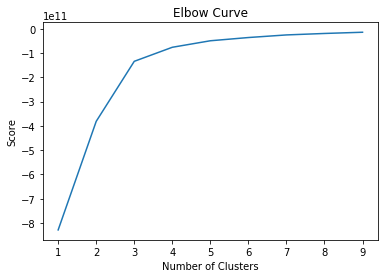

In [5]:
#Plotting elbow curve
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = df[['Latitude']]
X_axis = df[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [6]:
# Computing k means clustering
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(df) # Compute k-means clustering.
df['cluster_label'] = kmeans.fit_predict(df)
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df[df.columns[:2]]) # Labels of each point
df.head(10)

,Latitude,Longitude,cluster_label
0,625983,297439,0
1,626146,297440,0
2,626144,297456,0
3,626004,297394,0
4,626018,297437,0
5,626038,297518,0
6,626022,297440,0
7,626027,297472,0
8,626021,297440,0
9,626070,297485,0


In [7]:
df.cluster_label.value_counts()

0    10912
2      910
1      909
3      736
Name: cluster_label, dtype: int64

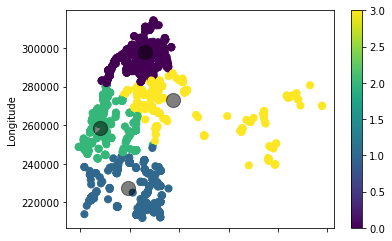

In [8]:
#plotting cluster
df.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
I used k-means clustering for this data because k-means clearly formed cluster which helped  for pre-clustering, reducing the space into disjoint smaller 
sub-spaces by which we can easily see the un labelled data.
I established hyperparameters by using the cluster count as 4 which I found by elbow method,init method is initialized with kmeans ++ which can help in speeding up convergence
Also,K-Means is suitable for a large number of datasets, so I chose this over other dataset.
